# Chapter 5: Computing forward gravity. (Under development)

GemPy also brings a module to compute the forward gravity response. The idea is to be able to use gravity as a likelihood to validate the geological models within the Bayesian inference. In this chapter we will see how we can compute the gravity response of the sandstone model of chapter 2.

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib inline

# Aux imports
import numpy as np

First we just recreate the model as usual.

In [2]:
# Importing the data from csv files and settign extent and resolution
geo_data = gp.create_data([696000,747000,6863000,6950000,-20000, 200],[50, 50, 50],
                         path_f = os.pardir+"/input_data/a_Foliations.csv",
                         path_i = os.pardir+"/input_data/a_Points.csv")

Setting the series and the formations order:

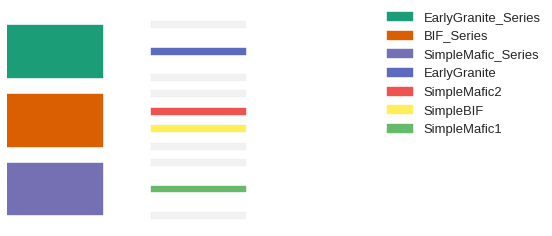

In [3]:
# Assigning series to formations as well as their order (timewise)
gp.set_series(geo_data, {"EarlyGranite_Series": 'EarlyGranite', 
                              "BIF_Series":('SimpleMafic2', 'SimpleBIF'),
                              "SimpleMafic_Series":'SimpleMafic1'}, 
                      order_series = ["EarlyGranite_Series",
                                      "BIF_Series",
                                      "SimpleMafic_Series"],
                      order_formations= ['EarlyGranite', 'SimpleMafic2', 'SimpleBIF', 'SimpleMafic1'],
              verbose=1)

Projection in 2D:

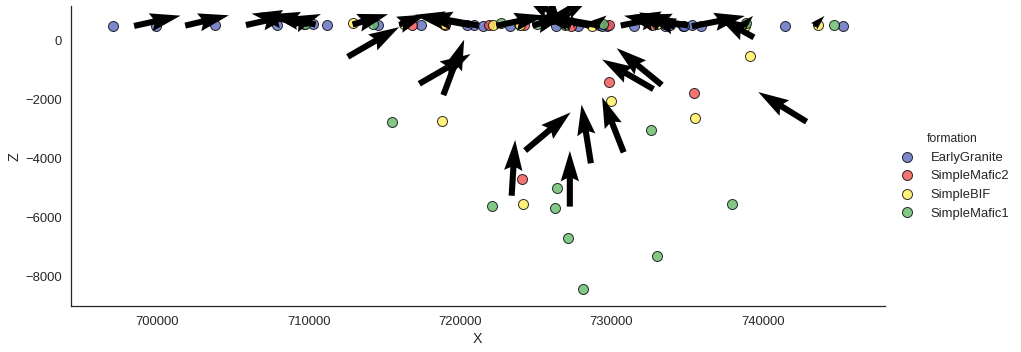

In [4]:
gp.plot_data(geo_data)

## Computing the model

Now as in the previous chapter we just need to create the interpolator object and compute the model.

In [5]:
interp_data = gp.InterpolatorInput(geo_data)

Level of Optimization:  fast_run
Device:  cpu
Precision:  float32


In [6]:
lith_block, fault_block = gp.compute_model(interp_data)

The green rectangle represent the area where we want to compute the forward gravity (in this case is due to this is the area where we have measured data). As we can see the original extent of the geological model is not going to be enough (remember that gravity is affected by a cone, not only the mass right below). An advantage of the method is that we can extrapolate as much as needed keeping in mind that the error will increase accordingly.

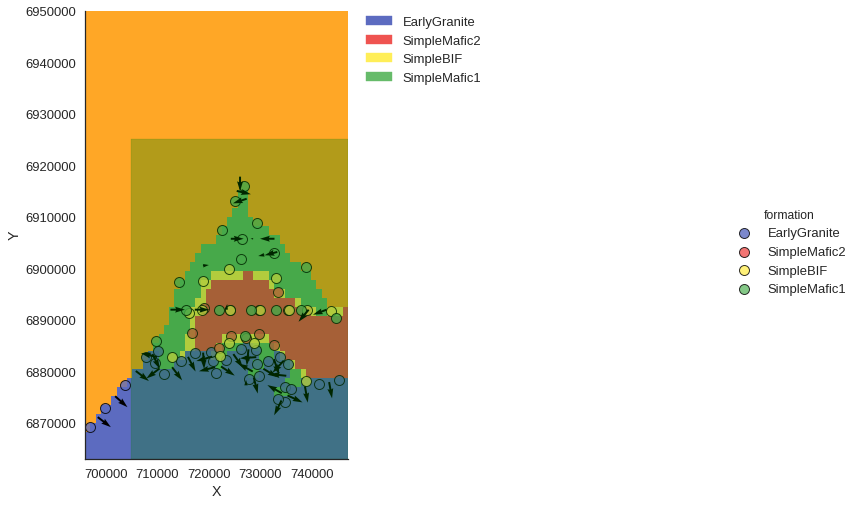

In [7]:
import matplotlib.pyplot as plt

gp.plot_section(geo_data, lith_block[0], -1, plot_data=True, direction='z')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

from matplotlib.patches import Rectangle

currentAxis = plt.gca()

currentAxis.add_patch(Rectangle((7.050000e+05, 6863000),  747000 - 7.050000e+05, 6925000 - 6863000,
                      alpha=0.3, fill='none', color ='green' ))

In [8]:
ver_s, sim_s = gp.get_surfaces(interp_data,lith_block[1],
                               None,
                               original_scale=False)

In [16]:
gp.plot_surfaces_3D_real_time(interp_data, ver_s, sim_s)

So we recalculate all just adding some padding around the measured data (the green rectangle)

Level of Optimization:  fast_run
Device:  cpu
Precision:  float32


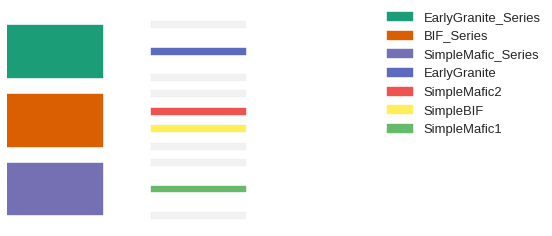

In [8]:
# Importing the data from csv files and settign extent and resolution
geo_data_extended = gp.create_data([696000-10000,747000 + 20600,6863000 - 20600,6950000 + 20600,-20000, 600],[50, 50, 50],
                         path_f = os.pardir+"/input_data/a_Foliations.csv",
                         path_i = os.pardir+"/input_data/a_Points.csv")


# Assigning series to formations as well as their order (timewise)
gp.set_series(geo_data_extended, {"EarlyGranite_Series": 'EarlyGranite', 
                              "BIF_Series":('SimpleMafic2', 'SimpleBIF'),
                              "SimpleMafic_Series":'SimpleMafic1'}, 
                      order_series = ["EarlyGranite_Series",
                                      "BIF_Series",
                                      "SimpleMafic_Series"],
                      order_formations= ['EarlyGranite', 'SimpleMafic2', 'SimpleBIF', 'SimpleMafic1'],
              verbose=1)

interp_data_extended = gp.InterpolatorInput(geo_data_extended, output='geology', compile_theano=True)

In [9]:
lith_ext, fautl = gp.compute_model(interp_data_extended)

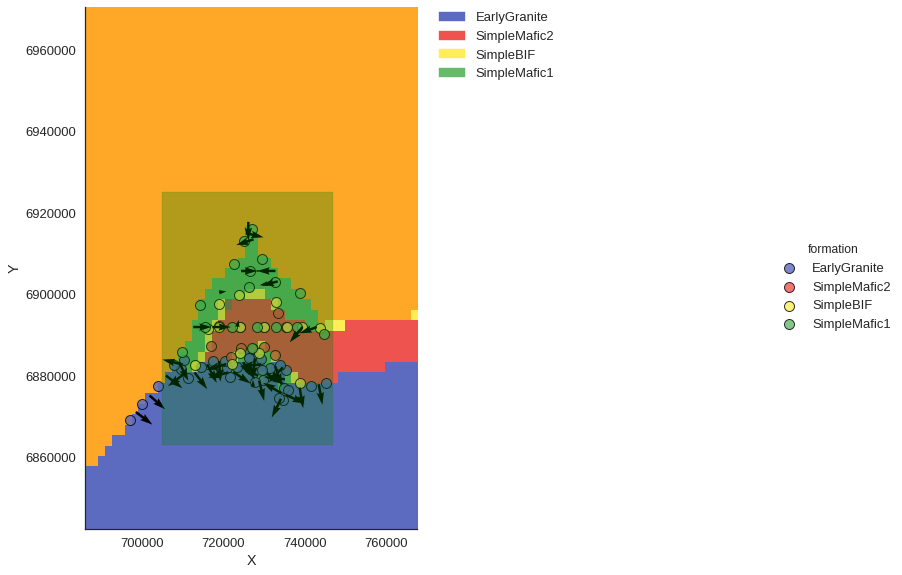

In [10]:
import matplotlib.pyplot as plt

gp.plot_section(geo_data_extended, lith_ext[0], -1, plot_data=True, direction='z')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

from matplotlib.patches import Rectangle

currentAxis = plt.gca()

currentAxis.add_patch(Rectangle((7.050000e+05, 6863000),  747000 - 7.050000e+05, 6925000 - 6863000,
                      alpha=0.3, fill='none', color ='green' ))

In [11]:
interp_data_grav = gp.InterpolatorInput(geo_data_extended, output='gravity', compile_theano=True)

Level of Optimization:  fast_run
Device:  cpu
Precision:  float32


In [12]:
gp.set_geophysics_obj(interp_data_grav,  [7.050000e+05,747000,6863000,6925000,-20000, 200],
                                             [50,50], )

In [13]:
gp.precomputations_gravity(interp_data_grav, 25, [2.92, 3.1, 2.92, 2.61, 2.61])

0 25
25 50
50 75
75 100
100 125
125 150
150 175
175 200
200 225
225 250
250 275
275 300
300 325
325 350
350 375
375 400
400 425
425 450
450 475
475 500
500 525
525 550
550 575
575 600
600 625
625 650
650 675
675 700
700 725
725 750
750 775
775 800
800 825
825 850
850 875
875 900
900 925
925 950
950 975
975 1000
1000 1025
1025 1050
1050 1075
1075 1100
1100 1125
1125 1150
1150 1175
1175 1200
1200 1225
1225 1250
1250 1275
1275 1300
1300 1325
1325 1350
1350 1375
1375 1400
1400 1425
1425 1450
1450 1475
1475 1500
1500 1525
1525 1550
1550 1575
1575 1600
1600 1625
1625 1650
1650 1675
1675 1700
1700 1725
1725 1750
1750 1775
1775 1800
1800 1825
1825 1850
1850 1875
1875 1900
1900 1925
1925 1950
1950 1975
1975 2000
2000 2025
2025 2050
2050 2075
2075 2100
2100 2125
2125 2150
2150 2175
2175 2200
2200 2225
2225 2250
2250 2275
2275 2300
2300 2325
2325 2350
2350 2375
2375 2400
2400 2425
2425 2450
2450 2475
2475 2500


(array([[  2.32206772e-05,   1.38317570e-05,   4.37779836e-06, ...,
           1.38316011e-05,   4.37774898e-06,  -5.09674338e-06],
        [  2.32206772e-05,   1.38317570e-05,   4.37779837e-06, ...,
           1.38316011e-05,   4.37774898e-06,  -5.09674338e-06],
        [  2.32206772e-05,   1.38317570e-05,   4.37779837e-06, ...,
           1.38316011e-05,   4.37774898e-06,  -5.09674338e-06],
        ..., 
        [  2.32204160e-05,   1.38316011e-05,   4.37774898e-06, ...,
           1.38316011e-05,   4.37774898e-06,  -5.09674338e-06],
        [  2.32204160e-05,   1.38316011e-05,   4.37774898e-06, ...,
           1.38316011e-05,   4.37774898e-06,  -5.09674338e-06],
        [  2.32204160e-05,   1.38316011e-05,   4.37774898e-06, ...,
           1.38316011e-05,   4.37774898e-06,  -5.09674338e-06]]),
 array([False, False, False, ..., False, False, False], dtype=bool))

In [14]:
%%timeit
grav = gp.compute_model(interp_data_grav, 'gravity')

2.34 s ± 13.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
grav = gp.compute_model(interp_data_grav, 'gravity')

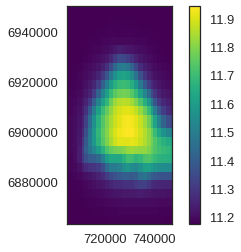

In [17]:
import matplotlib.pyplot as plt

plt.imshow(grav.reshape(50,50), cmap='viridis', origin='lower', extent=[7.050000e+05,747000,6863000,6950000] )
plt.colorbar()